In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

### Data Preprocessing

In [2]:
data = pd.read_csv('creditcard.csv')
df = data.copy() # To keep the data as backup
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(6999, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.Time.tail(15)

6984    9123
6985    9125
6986    9129
6987    9130
6988    9137
6989    9140
6990    9140
6991    9141
6992    9145
6993    9145
6994    9147
6995    9148
6996    9150
6997    9151
6998    9155
Name: Time, dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,...,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,3435.334905,-0.280002,0.294414,0.864823,0.196826,-0.012354,0.174677,-0.010057,-0.046733,0.528615,...,-0.046436,-0.163817,-0.033991,0.023259,0.090952,-0.028172,0.021777,0.003751,66.096998,0.003572
std,2465.130401,1.445687,1.275415,1.103247,1.470714,1.178388,1.344235,1.055150,1.300724,1.096084,...,0.912507,0.653780,0.423772,0.610797,0.423245,0.495386,0.392880,0.271575,191.830376,0.059663
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.483441,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1353.500000,-1.029017,-0.270284,0.324678,-0.735792,-0.625978,-0.662506,-0.510980,-0.192537,-0.176370,...,-0.267551,-0.595112,-0.186356,-0.351664,-0.160740,-0.388441,-0.052601,-0.019566,4.560000,0.000000
50%,2992.000000,-0.416285,0.348353,0.924389,0.245479,-0.096779,-0.139949,0.022485,0.029875,0.486350,...,-0.121126,-0.176222,-0.047011,0.091046,0.111372,-0.068157,0.012548,0.019379,16.660000,0.000000
75%,5075.500000,1.114221,0.962684,1.558964,1.137954,0.428944,0.586899,0.547189,0.332546,1.123521,...,0.055814,0.270597,0.086045,0.423732,0.361069,0.256978,0.150659,0.081528,57.420000,0.000000
max,9155.000000,1.685314,7.906022,4.101716,7.380245,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,13.876221,3.200201,5.525093,3.517346,3.852046,4.860769,7712.430000,1.000000


### Checking the frequency of frauds before moving forward

In [8]:
df.Class.value_counts()

Class
0    6974
1      25
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

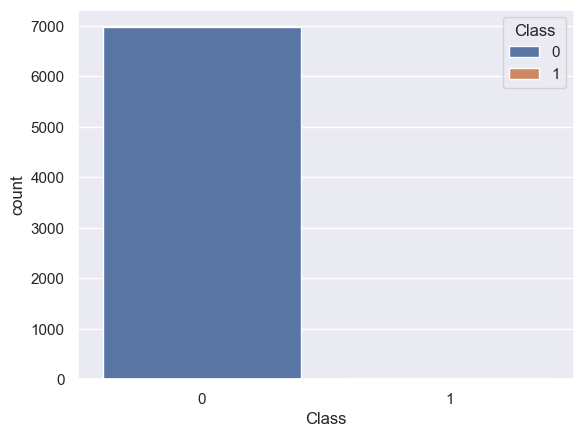

In [9]:
sns.countplot(x=df.Class, hue=df.Class)

### Checking the distribution amount

<Axes: xlabel='Amount', ylabel='Density'>

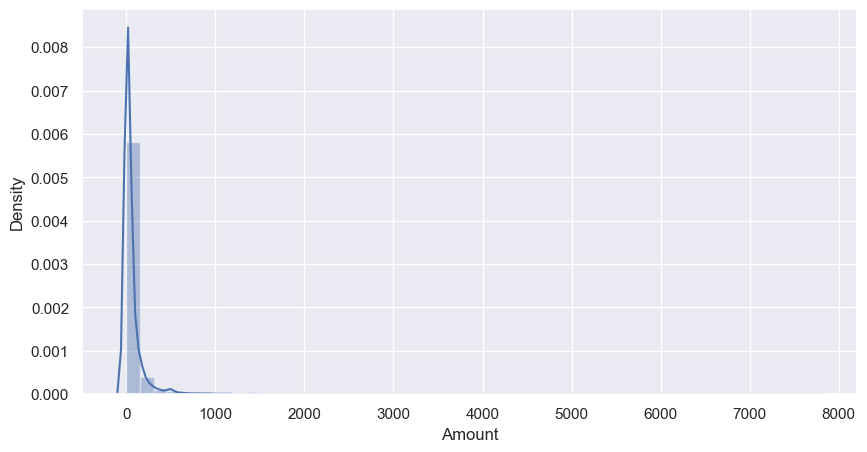

In [10]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

In [11]:
df['Amount-Bins'] = ''

In [12]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels


In [13]:
bins, bin_labels = make_bins(df.Amount, size=10)

In [14]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 856
1,0 to 856
2,0 to 856
3,0 to 856
4,0 to 856


In [15]:
df['Amount-Bins'].value_counts()

Amount-Bins
0 to 856        6947
856 to 1713       41
1713 to 2570       6
3427 to 4284       3
2570 to 3427       1
6855 to 7712       1
4284 to 5141       0
5141 to 5998       0
5998 to 6855       0
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '0 to 856'),
  Text(1, 0, '856 to 1713'),
  Text(2, 0, '1713 to 2570'),
  Text(3, 0, '2570 to 3427'),
  Text(4, 0, '3427 to 4284'),
  Text(5, 0, '4284 to 5141'),
  Text(6, 0, '5141 to 5998'),
  Text(7, 0, '5998 to 6855'),
  Text(8, 0, '6855 to 7712')])

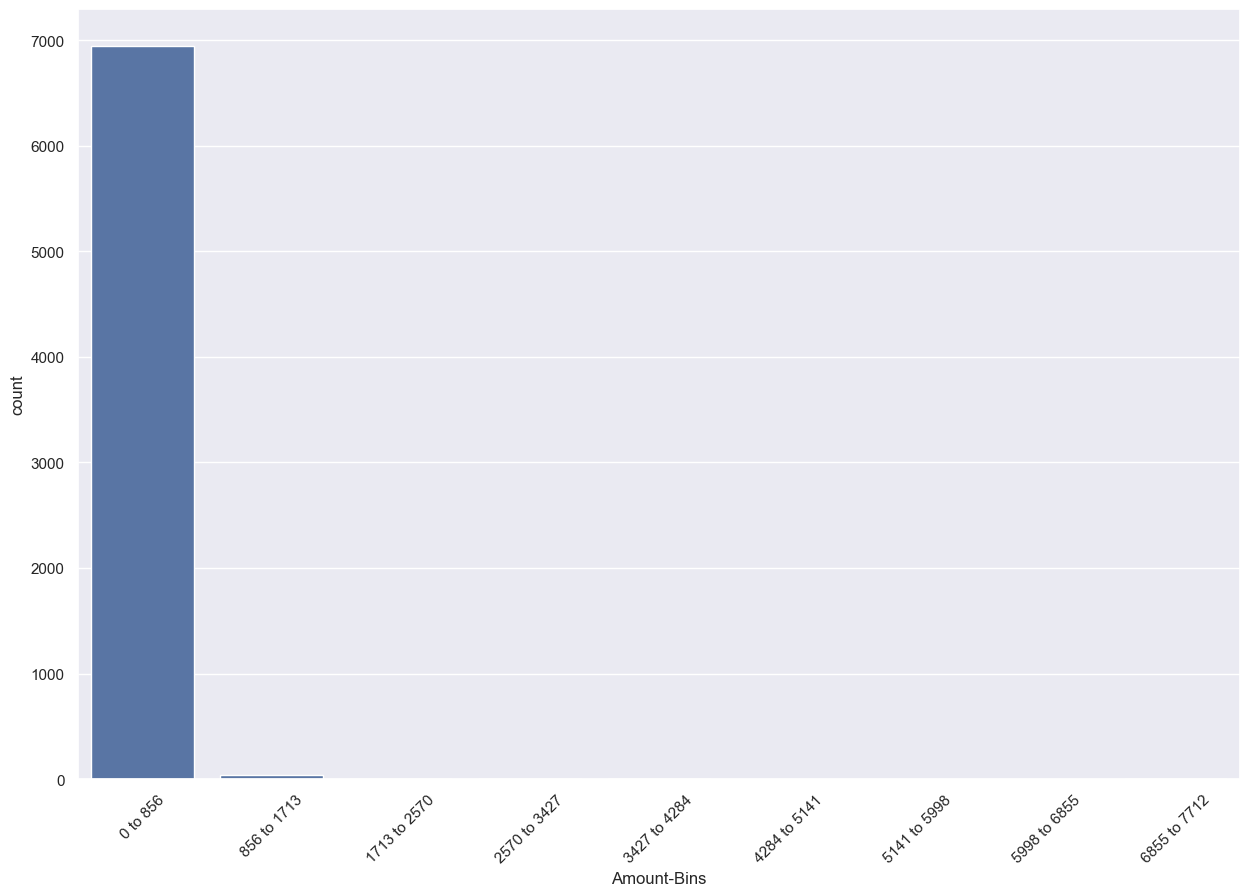

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '0 to 856'),
  Text(1, 0, '856 to 1713'),
  Text(2, 0, '1713 to 2570'),
  Text(3, 0, '2570 to 3427'),
  Text(4, 0, '3427 to 4284'),
  Text(5, 0, '4284 to 5141'),
  Text(6, 0, '5141 to 5998'),
  Text(7, 0, '5998 to 6855'),
  Text(8, 0, '6855 to 7712')])

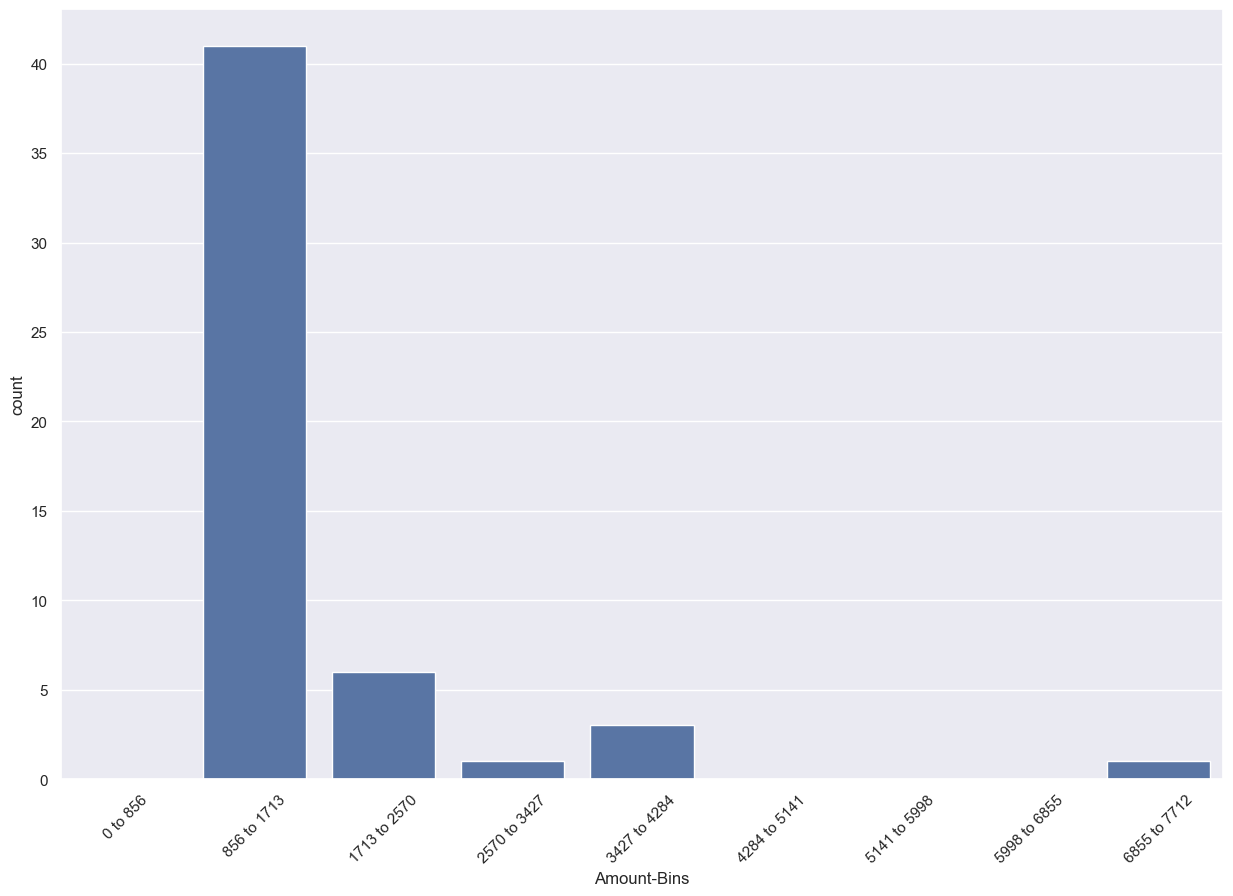

In [17]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 856')])
plt.xticks(rotation=45)

# 
Predictive Modelling

## One-hot encoding the Amount-Bins

In [18]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount-Bins_0 to 856,Amount-Bins_856 to 1713,Amount-Bins_1713 to 2570,Amount-Bins_2570 to 3427,Amount-Bins_3427 to 4284,Amount-Bins_4284 to 5141,Amount-Bins_5141 to 5998,Amount-Bins_5998 to 6855,Amount-Bins_6855 to 7712
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,True,False,False,False,False,False,False,False,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,True,False,False,False,False,False,False,False,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,True,False,False,False,False,False,False,False,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,True,False,False,False,False,False,False,False,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,True,False,False,False,False,False,False,False,False


### Breaking the dataset into training and testing

In [20]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((6999, 39), (6999,))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(4899, 39) (4899,)
(2100, 39) (2100,)


### Applying Machine Learning Algorithm

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
# Training the algorithm
lr_model.fit(xtrain, ytrain)
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

In [24]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#Let's first look at the confusion matrix.

tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,5,0
Not Fraud,2,2093


<Axes: >

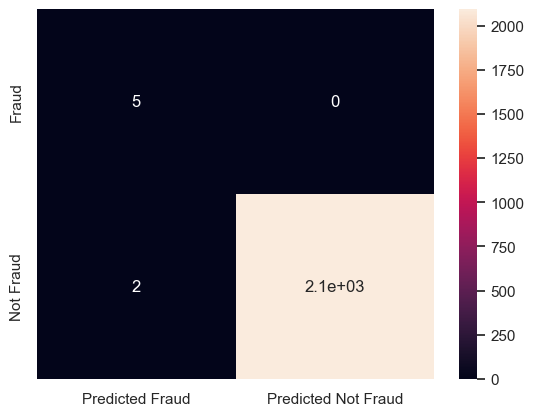

In [25]:
sns.heatmap(conf_matrix, annot=True)

In [26]:
lr_accuracy = accuracy_score(ytest, lr_pred_test)
lr_accuracy

0.9990476190476191

In [27]:
lr_precision = precision_score(ytest, lr_pred_test)
lr_precision

0.7142857142857143

In [28]:
lr_recall = recall_score(ytest, lr_pred_test)
lr_recall

1.0

In [29]:
lr_recall_train = recall_score(ytrain, lr_pred_train)
lr_recall_train

0.95

In [30]:
from sklearn.metrics import f1_score
lr_f1 = f1_score(ytest, lr_pred_test)
lr_f1

0.8333333333333333

In [31]:
from sklearn.metrics import classification_report
print(classification_report(ytest, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2095
           1       0.71      1.00      0.83         5

    accuracy                           1.00      2100
   macro avg       0.86      1.00      0.92      2100
weighted avg       1.00      1.00      1.00      2100



In [32]:
lr_pred_test_prob = lr_model.predict_proba(xtest)[:, 1]

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(ytest, lr_pred_test_prob)
#Also, let's get the auc score.

lr_auc = roc_auc_score(ytest, lr_pred_test_prob)
lr_auc

1.0

In [34]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve', fontsize=15)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('False Positive Rates', fontsize=15)
    plt.ylabel('True Positive Rates', fontsize=15)
    plt.legend(loc='best')
    
    plt.show()

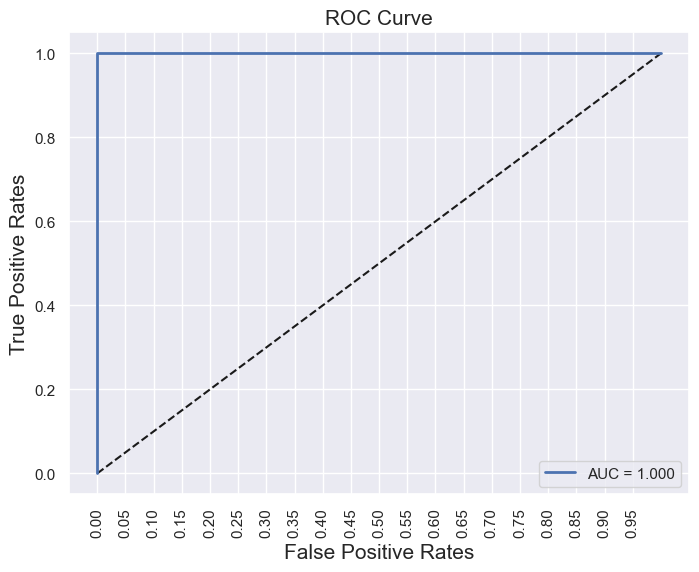

In [35]:
plot_roc_curve(fpr=fpr, tpr=tpr, label="AUC = %.3f" % lr_auc)

### Model Complexity

#### 2nd degree polynomial

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly, ytrain)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:, 1]
test_prob = model.predict_proba(xtest_poly)[:, 1]

# Computing the ROC Score
roc_auc_score(ytrain, train_prob), roc_auc_score(ytest, test_prob)

(0.9956241032998565, 1.0)

In [38]:
fpr_poly, tpr_poly, threshold_poly = roc_curve(ytest, test_prob)

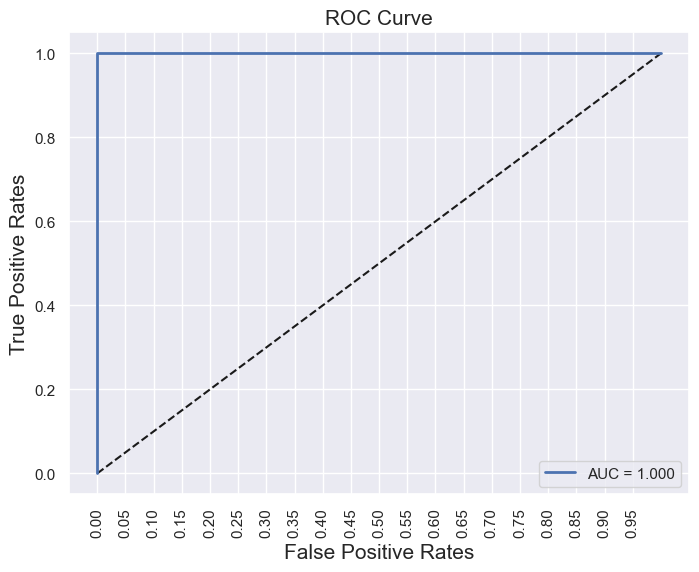

In [39]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(ytest, test_prob))

In [40]:
recall_score(ytest, model.predict(xtest_poly))

1.0

## Support Vector Machine

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
mms = MinMaxScaler()

In [43]:
# Let's first check the head of the explanatory variables which are to be scaled.
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0 to 856,Amount-Bins_856 to 1713,Amount-Bins_1713 to 2570,Amount-Bins_2570 to 3427,Amount-Bins_3427 to 4284,Amount-Bins_4284 to 5141,Amount-Bins_5141 to 5998,Amount-Bins_5998 to 6855,Amount-Bins_6855 to 7712
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,True,False,False,False,False,False,False,False,False
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,True,False,False,False,False,False,False,False,False
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,True,False,False,False,False,False,False,False,False
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,True,False,False,False,False,False,False,False,False
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,True,False,False,False,False,False,False,False,False


In [44]:
X_scaled = mms.fit_transform(X)

In [45]:
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0 to 856,Amount-Bins_856 to 1713,Amount-Bins_1713 to 2570,Amount-Bins_2570 to 3427,Amount-Bins_3427 to 4284,Amount-Bins_4284 to 5141,Amount-Bins_5141 to 5998,Amount-Bins_5998 to 6855,Amount-Bins_6855 to 7712
0,0.000000,0.876976,0.762157,0.905079,0.501396,0.742766,0.274718,0.279411,0.862634,0.322594,...,0.019400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.980064,0.772261,0.761374,0.424139,0.752083,0.255841,0.272675,0.862140,0.275509,...,0.000349,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000109,0.877034,0.724377,0.858804,0.418459,0.738909,0.321086,0.291085,0.868049,0.179758,...,0.049097,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000109,0.892875,0.758805,0.860003,0.315195,0.750438,0.301913,0.279369,0.872766,0.189463,...,0.016013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000218,0.885119,0.790492,0.845191,0.420391,0.741155,0.262019,0.286886,0.849212,0.357112,...,0.009075,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
xtrainS, xtestS, ytrainS, ytestS = train_test_split(
    X_scaled, Y, random_state=42, test_size=0.30, shuffle=True)

In [47]:
print(xtrainS.shape, ytrainS.shape)
print(xtestS.shape, ytestS.shape)

(4899, 39) (4899,)
(2100, 39) (2100,)


In [48]:
from sklearn.svm import SVC

In [49]:
svc_model = SVC(kernel='linear', probability=True)

In [50]:
svc_model.fit(xtrainS, ytrainS)

SVC(kernel='linear', probability=True)

In [51]:
svc_pred = svc_model.predict(xtestS)

In [52]:
svc_recall = recall_score(ytestS, svc_pred)

In [53]:
svc_recall

1.0

In [54]:
svc_pred_prob = svc_model.predict_proba(xtestS)[:, 1]

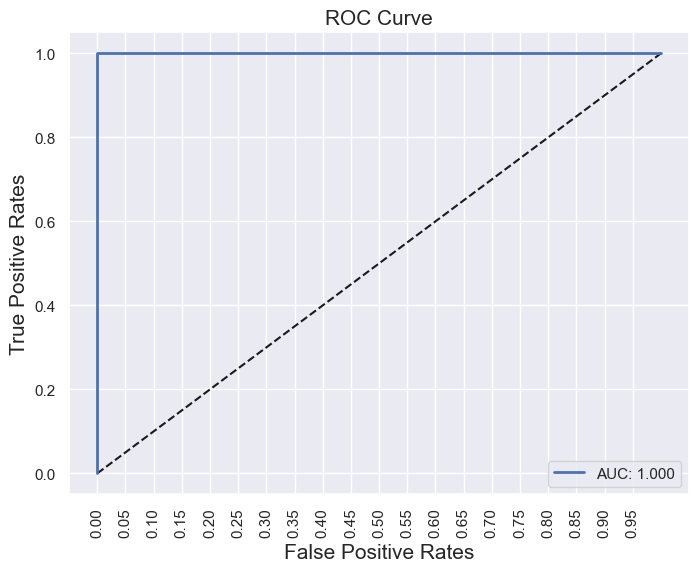

In [55]:
# First, getting the auc score
svc_auc = roc_auc_score(ytestS, svc_pred_prob)

# Now, let's get the fpr and tpr
fpr, tpr, threshold = roc_curve(ytestS, svc_pred_prob)

# Now, let's draw the curve
plot_roc_curve(fpr, tpr, 'AUC: %.3f' % svc_auc)

### Tunning the hyperparameter

In [56]:
# For Kernel = rbf
tuned_rbf = {'kernel': ['rbf'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = sigmoid
tuned_sigmoid = {'kernel': ['sigmoid'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = linear
tuned_linear = {'kernel': ['linear'], 'C': [
    0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
rs_rbf = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_rbf, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_sigmoid = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_sigmoid, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_linear = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_linear, n_iter=500, n_jobs=4, scoring='roc_auc')

### For kernel rbf

In [59]:
rs_rbf.fit(xtrainS, ytrainS)

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'gamma': [0.01, 0.001, 0.0001, 1e-05],
                                        'kernel': ['rbf']},
                   scoring='roc_auc')

In [60]:
rs_rbf.best_estimator_

SVC(C=1000, gamma=0.001, probability=True)

In [61]:
svc_rbf_best_est = rs_rbf.best_estimator_

In [62]:
svc_rbf_best_est.fit(xtrainS, ytrainS)

SVC(C=1000, gamma=0.001, probability=True)

In [63]:
svc_rbf_best_est_pred = svc_rbf_best_est.predict(xtestS)

In [64]:
svc_rbf_best_est_pred_proba = svc_rbf_best_est.predict_proba(xtestS)[:, 1]

In [65]:
svc_rbf_auc = roc_auc_score(ytestS, svc_rbf_best_est_pred_proba)

In [66]:
svc_rbf_recall = recall_score(ytestS, svc_rbf_best_est_pred)
svc_rbf_recall

1.0

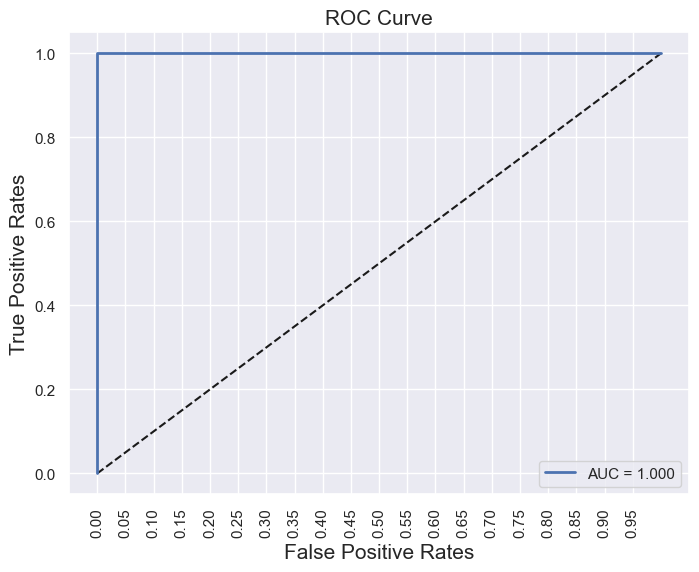

In [67]:
fpr, tpr, threshold = roc_curve(ytestS, svc_rbf_best_est_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_rbf_auc)

### For Kernel Sigmoid

In [68]:
rs_sigmoid.fit(xtrainS, ytrainS)

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'gamma': [0.01, 0.001, 0.0001, 1e-05],
                                        'kernel': ['sigmoid']},
                   scoring='roc_auc')

In [69]:
svc_sigmoid = rs_sigmoid.best_estimator_

In [70]:
svc_sigmoid.fit(xtrainS, ytrainS)

SVC(C=1000, gamma=0.01, kernel='sigmoid', probability=True)

In [71]:
svc_sigmoid_pred = svc_sigmoid.predict(xtestS)
svc_sigmoid_pred_proba = svc_sigmoid.predict_proba(xtestS)[:, 1]

In [72]:
svc_sigmoid_auc = roc_auc_score(ytestS, svc_sigmoid_pred_proba)
svc_sigmoid_auc

1.0

In [73]:
svc_sigmoid_recall = recall_score(ytestS, svc_sigmoid_pred)
svc_sigmoid_recall

1.0

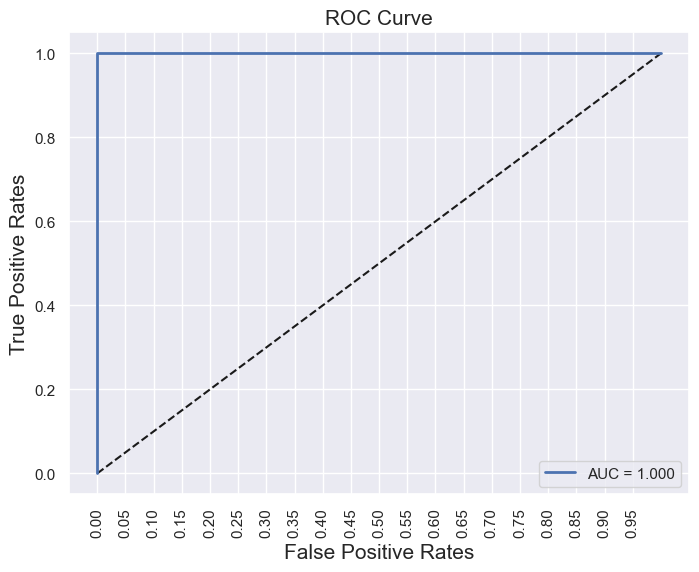

In [74]:
fpr, tpr, threshold = roc_curve(ytestS, svc_sigmoid_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_sigmoid_auc)

### Lets check for Linear kernel

In [75]:
rs_linear.fit(xtrainS, ytrainS)

RandomizedSearchCV(estimator=SVC(probability=True), n_iter=500, n_jobs=4,
                   param_distributions={'C': [0.001, 0.1, 0.1, 10, 25, 50, 100,
                                              1000],
                                        'kernel': ['linear']},
                   scoring='roc_auc')

In [76]:
svc_linear = rs_linear.best_estimator_

In [77]:
svc_linear.fit(xtrainS, ytrainS)

SVC(C=10, kernel='linear', probability=True)

In [78]:
svc_linear_pred = svc_linear.predict(xtestS)
svc_linear_pred_proba = svc_linear.predict_proba(xtestS)[:, 1]

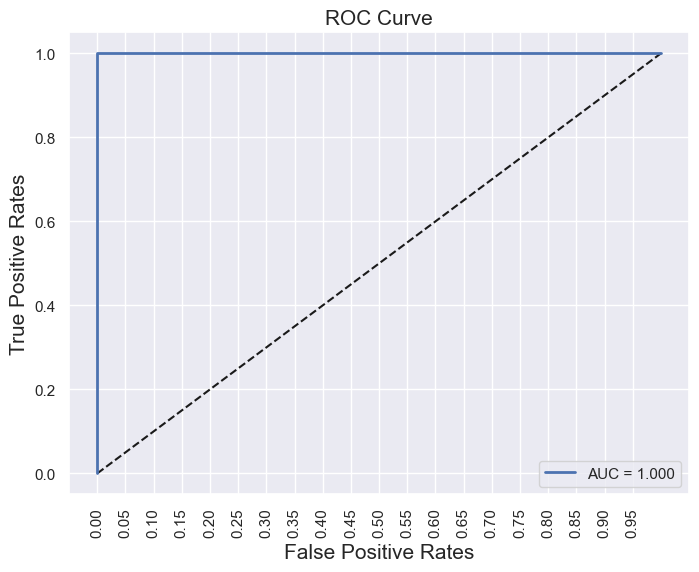

In [79]:
svc_linear_auc = roc_auc_score(ytestS, svc_linear_pred_proba)

fpr, tpr, threshold = roc_curve(ytestS, svc_linear_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_linear_auc)

In [80]:
svc_linear_recall = recall_score(ytestS, svc_linear_pred)
svc_linear_recall

1.0

### Naive Bayes Algorithm

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
nb = GaussianNB()

In [83]:
nb.fit(xtrain, ytrain)

GaussianNB()

In [84]:
nb_pred = nb.predict(xtest)
nb_pred_proba = nb.predict_proba(xtest)[:, 1]

In [85]:
nb_auc = roc_auc_score(ytest, nb_pred)

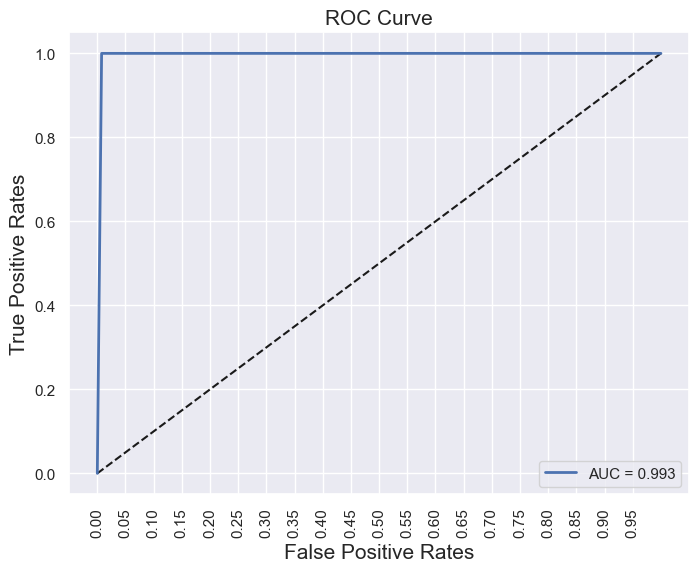

In [86]:
fpr, tpr, threshold = roc_curve(ytestS, nb_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % nb_auc)

In [87]:
nb_recall = recall_score(ytest, nb_pred)
nb_recall

1.0